In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split


iris = datasets.load_iris()

x=iris.data[:, [2,3]]
y = iris.target

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1, stratify=y)



**Getting the dataset from** `sklearn`

In [3]:

iris = datasets.load_iris()

x=iris.data[:, [2,3]]
y = iris.target

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1, stratify=y)


**Plotting function**

In [4]:
def plot_decision_regions(x,y, classifier,  test_idx = None, resolution = 0.02):
  from matplotlib.colors import ListedColormap

  # Marker generator + color map
  markers = ('s', 'x', 'o', '^', 'y')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])
  
  # Plot decision surfaces
  x1_min, x1_max = x[:, 0].min() - 1, x[:, 0].max() + 1
  x2_min, x2_max = x[:, 1].min() - 1, x[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
  z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  z = z.reshape(xx1.shape)
  plt.contourf(xx1, xx2, z, alpha = 0.3, cmap = cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())
  # Plot examples
  for idx, cl in enumerate(np.unique(y)):
    c = "Iris Versicolor" if cl == 1 else "Iris Setosa"
    plt.scatter(x = x[y==cl, 0], y = x[y == cl, 1],
                alpha = 0.8,
                c = colors[idx],
                marker = markers[idx],
                label = c,
                edgecolor='black')
    if test_idx:
      x_test, y_test = x[test_idx, :], y[test_idx]
      plt.scatter(x_test[:, 0], x_test[:, 1], c ='', edgecolor='black', alpha = 1.0, linewidth=1, marker='o', s =100, label='test set')
  #plt.show()


In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)
x_combined_std = np.vstack((x_train_std, x_test_std))
y_combined = np.hstack((y_train, y_test))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


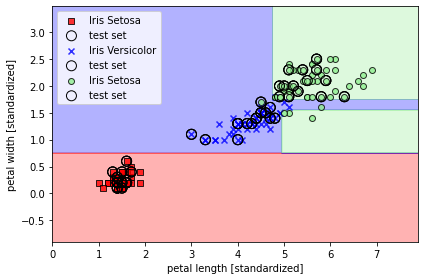

In [11]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state= 1)
tree_model.fit(x_train, y_train)
x_combined = np.vstack((x_train, x_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(x_combined, y_combined, classifier=tree_model, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

**Tree representation**

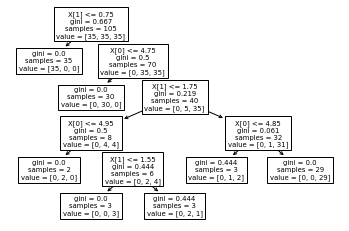

In [12]:
from sklearn import tree
tree.plot_tree(tree_model)
plt.show()

# Random Forest

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


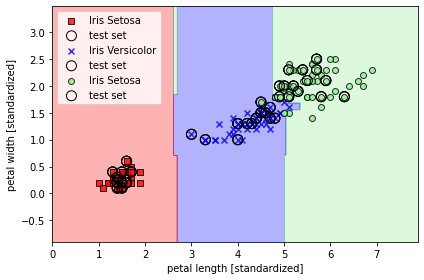

In [21]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion = 'gini', n_estimators = 24, random_state = 1, n_jobs = 2)
forest.fit(x_train, y_train)
plot_decision_regions(x_combined, y_combined, classifier=forest, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()